## Fingerprint Comparator

A relatively simple program to compare the ROC-AUC produced by different fingerprint methodologies available in Molfeat by Datamol.

Import dependencies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
from molfeat import trans
from molfeat.trans import pretrained
import datamol as dm
from sklearn import ensemble, model_selection

Read a generic dataset. Must have a column of SMILES strings and a binary-coded DILI column.

In [2]:
tox_df_mf = pd.read_csv("Transformed_Data/Final_DILI.csv")

Instantiate a scikit-learn random forest classifier and define a function to compute the average ROC-AUC score.

In [3]:
model_rf_mf = ensemble.RandomForestClassifier(random_state=42)


def average(lst):
    return sum(lst) / len(lst)

### The main loop
* Create a tuple of Molfeat fingerprint types to compare
* Make a Pandas dataframe of SMILES strings
* Convert SMILES strings to an arbitrary Molfeat fingerprint type using Molfeat
* Set features & labels
* Average the ROC-AUC score of a scikit-learn classifier model across 5 cross-validations
* Print mean scores as they are computed & **append them to a list of scores**

In [ ]:
# regular_fingerprints = ('maccs', 'avalon', 'ecfp', 'fcfp', 'topological', 'atompair', 'rdkit', 'pattern', 'layered', 'secfp') # Tuple of fingerprint types to compare
# #regular_fingerprints = ('maccs', 'avalon')

# morgan_df_mf = pd.DataFrame(tox_df_mf['SMILES']) # New dataframe of just SMILES strings

# score_list = []

# for regular_fingerprint in regular_fingerprints:
#     fp_trans = trans.MoleculeTransformer(featurizer=regular_fingerprint) # Instantiate Molfeat transformer class implementing calculator defined above
#     morgan_df_mf = np.array(fp_trans.transform(tox_df_mf['SMILES'].values)) # Generate fingerprints

#     X = morgan_df_mf # Features
#     y = tox_df_mf['DILI?'] # Labels

#     score = average(model_selection.cross_val_score(model_rf_mf, list(X), y, scoring='roc_auc', cv=5)) # Average AUC-ROC score across n cross-validations
#     print(f'{round(score, 3)} AUC-ROC for {regular_fingerprint} fingerprints') # Print AUC-ROC for each fingerprint type

#     score_list = score_list[:] + [score] # Append averaged ROC-AUC for each fingerprint to a list

In [ ]:
# huggingface_fingerprints = ['ChemGPT-4.7M']

# for huggingface_fingerprint in huggingface_fingerprints:
#     store.load(huggingface_fingerprint, download_output_dir=f"Hugging Face Models/{huggingface_fingerprint}")

In [ ]:
# regular_fingerprints = (
#     "maccs",
#     "avalon",
#     "ecfp",
#     "fcfp",
#     "topological",
#     "atompair",
#     "rdkit",
#     "pattern",
#     "layered",
#     "secfp",
# )  # Tuple of fingerprint types to compare
# huggingface_fingerprints = ["ChemGPT-4.7M"]

# from molfeat.trans import pretrained
# from tqdm import tqdm

# # morgan_df_mf = pd.DataFrame(tox_df_mf['SMILES']) # New dataframe of just SMILES strings

# reg_fp_scores, hf_fp_scores = [], []
# y = tox_df_mf["DILI?"]  # Labels


# def reg_loop():
#     for regular_fingerprint in regular_fingerprints:
#         reg_fp_transformer = trans.MoleculeTransformer(featurizer=regular_fingerprint)  # Instantiate Molfeat transformer class implementing calculator defined above
#         reg_df_mf = np.array(reg_fp_transformer.transform(tox_df_mf["SMILES"].values))  # Generate fingerprints

#         X = reg_df_mf  # Features

#         reg_score = average(model_selection.cross_val_score(model_rf_mf, list(X), y, scoring="roc_auc", cv=5))  # Average AUC-ROC score across n cross-validations
#         print(f"{round(reg_score, 3)} AUC-ROC for {regular_fingerprint} fingerprints")  # Print AUC-ROC for each fingerprint type
#         reg_score_list = reg_fp_scores[:] + [reg_score]  # Append averaged ROC-AUC for each fingerprint to a list


# def hf_loop():
#     for huggingface_fingerprint in tqdm(huggingface_fingerprints):
#         hf_fp_transformer = pretrained.PretrainedHFTransformer(kind=huggingface_fingerprint)  # Requires fsspec 2023.6.0 (conda install -c conda-forge fsspec v2023.6.0)
#         hf_df_mf = np.array(hf_fp_transformer.transform(tox_df_mf["SMILES"].values))  # Generate fingerprints

#         X2 = hf_df_mf  # Features

#         hf_score = average(model_selection.cross_val_score(model_rf_mf, list(X2), y, scoring="roc_auc", cv=5))  # Average AUC-ROC score across n cross-validations
#         print(f"{round(hf_score, 3)} AUC-ROC for {huggingface_fingerprints} fingerprints")  # Print AUC-ROC for each fingerprint type
#         hf_score_list = hf_fp_scores[:] + [hf_score]  # Append averaged ROC-AUC for each fingerprint to a list


# import threading

# p1 = threading.Thread(target=reg_loop).start()
# # p2 = threading.Thread(target=hf_loop).start()

# print("It doesn't look like it's working, but it is.")

In [5]:
regular_fingerprints = [
    "maccs",
    "avalon",
    "ecfp",
    "fcfp",
    "topological",
    "atompair",
    "rdkit",
    "pattern",
    "layered",
    "secfp",
]

huggingface_fingerprints = [
    "ChemGPT-4.7M",
    "ChemGPT-19M",
    "GPT2-Zinc480M-87M",
    "MolT5",
]


class fingerprint_comparator:
    def __init__(
        self,
        regular_fingerprints: list or str,
        huggingface_fingerprints: list or str,
        scoring: str,
        smiles,
        labels: pd.Series,
    ) -> None:
        """
        :param tuple regular_fingerprints: A tuple of Molfeat default fingerprints (e.g. MACCS)
        :param tuple huggingface_fingerprints: A tuple of huggingface fingerprints available on the Molfeat featuriser store
        :param scoring: A method of scikit learn scoring to use - https://scikit-learn.org/stable/modules/model_evaluation.html
        :param smiles: A pandas series of labels for model testing
        :param labels: A pandas series of labels for model testing
        """
        self.regular_fingerprints = regular_fingerprints
        self.huggingface_fingerprints = huggingface_fingerprints
        self.scoring = scoring
        self.smiles = smiles
        self.labels = labels
        self.reg_fp_scores, self.hf_fp_scores, self.final_score_list, self.final_fp_list = [], [], [], []

    def average(self):
        return sum(lst) / len(lst)

    def reg_loop(self):
        for regular_fingerprint in self.regular_fingerprints:
            reg_fp_transformer = trans.MoleculeTransformer(featurizer=regular_fingerprint)
            reg_df_mf = np.array(reg_fp_transformer.transform(self.smiles))  # Generate fingerprints

            reg_score = average(model_selection.cross_val_score(model_rf_mf, reg_df_mf, self.labels, scoring=self.scoring))  # Average AUC-ROC score across n cross-validations
            self.reg_fp_scores = self.reg_fp_scores[:] + [reg_score]  # Append averaged ROC-AUC for each fingerprint to a list
        return self.reg_fp_scores

    def hf_loop(self):
        for huggingface_fingerprint in self.huggingface_fingerprints:
            hf_fp_transformer = pretrained.PretrainedHFTransformer(kind=huggingface_fingerprint)  # Requires fsspec 2023.6.0 (conda install -c conda-forge fsspec v2023.6.0)
            hf_df_mf = np.array(hf_fp_transformer.transform(self.smiles))  # Generate fingerprints

            hf_score = average(model_selection.cross_val_score(model_rf_mf, hf_df_mf, self.labels, scoring=self.scoring))  # Average AUC-ROC score across n cross-validations
            self.hf_fp_scores = self.hf_fp_scores[:] + [hf_score]  # Append averaged ROC-AUC for fingerprints to a list
        return self.hf_fp_scores


x = fingerprint_comparator(
    regular_fingerprints=regular_fingerprints,
    huggingface_fingerprints=huggingface_fingerprints,
    scoring="roc_auc",
    smiles=tox_df_mf["SMILES"],
    labels=tox_df_mf["DILI?"],
)

reg_scores = x.reg_loop()
hf_scores = x.hf_loop()
final_scores = reg_scores + hf_scores
final_fingerprints = regular_fingerprints + huggingface_fingerprints

  0%|          | 0.00/736 [00:00<?, ?B/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0.00/716 [00:00<?, ?B/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0.00/839 [00:00<?, ?B/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Create a Pandas dataframe
* Column 1 - Fingerprint
* Column 2 - Mean ROC-AUC score for that fingerprint across 5 cross-validations

In [6]:
scores_df = pd.DataFrame(data=(final_fingerprints, final_scores)).transpose()  # Create a Pandas dataframe of the AUC-ROC scores and the fingerprint type associated with that score
scores_df = scores_df.rename(columns={0: "Fingerprint", 1: "Score (ROC-AUC)"})

Chart presentation calculations
* Compute mean AUC-ROC score. This is used to set a the baseline (mean) score
* Add a dataframe column for the size of the ROC-AUC score when the normalised chart is used. Necessary to prevent full-size bar being shown as should be in the case when 0 is the baseline.
* Sort dataframe so the chart is sorted

In [7]:
scores_mean = average(scores_df.iloc[:, 1])  # Compute average AUC-ROC score for purposes of barchart normalisation
scores_df["Score (ROC-AUC) - Normalised to Mean"] = (
    scores_df.iloc[:, 1] - scores_mean
)  # Barchart bar height absolute, so subtract the mean from the bar height. Otherwise bars will have their bases at `mean`, but still be full height (as if they were at a base of 0)

scores_df = scores_df.sort_values("Score (ROC-AUC) - Normalised to Mean", ascending=False)  # Sort the Pandas DF In descending order

print(scores_df)

          Fingerprint Score (ROC-AUC) Score (ROC-AUC) - Normalised to Mean
8             layered        0.893057                             0.023722
0               maccs         0.89158                             0.022245
5            atompair        0.890784                             0.021448
1              avalon        0.886513                             0.017178
13              MolT5        0.884113                             0.014777
2                ecfp        0.874979                             0.005643
9               secfp         0.87476                             0.005425
6               rdkit        0.871878                             0.002542
4         topological        0.867047                            -0.002288
3                fcfp        0.865629                            -0.003707
10       ChemGPT-4.7M        0.859455                             -0.00988
7             pattern        0.859007                            -0.010328
11        ChemGPT-19M    

Seaborn barplot generation - Normalised to mean with rotated X-axis labels

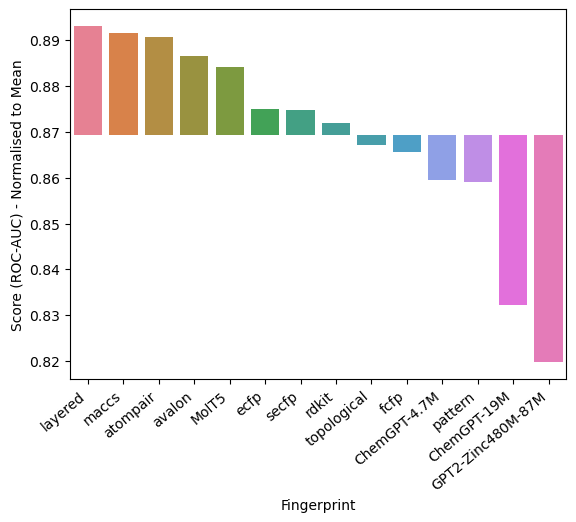

In [8]:
# Generate a Seaborn barplot
fp_plot = sns.barplot(
    scores_df,
    x="Fingerprint",
    y="Score (ROC-AUC) - Normalised to Mean",
    hue="Fingerprint",
    bottom=scores_mean,
)

# The semicolons at the line end stop Seaborn printing a dataframe
fp_plot.xaxis.set_ticks(scores_df["Fingerprint"])
# Prevent Seaborn error if x-axis ticks not explicitly defined before the next line is run
fp_plot.set_xticklabels(fp_plot.get_xticklabels(), rotation=40, ha="right");  # Rotate X-axis labels

In [ ]:
## Previous implementation of the fingerpirnt generator & comparator loop - Ignore, but it will work if you uncomment it.

# fp_list = ['maccs', 'avalon', 'ecfp', 'ecfp-count', 'fcfp', 'topological', 'atompair', 'rdkit', 'pattern', 'layered', 'secfp']

# score_list = []
# for fingerprint in fp_list:
#     fp_calc = calc.FPCalculator(fingerprint)
#     fp_trans = trans.MoleculeTransformer(fp_calc)
#     tox_df_mf["fp"] = fp_trans.transform(tox_df_mf['SMILES'].values)
#     morgan_df_mf = pd.DataFrame(tox_df_mf['fp'])
#     morgan_df_mf.insert(len(morgan_df_mf.columns), 'DILI?', tox_df_mf['DILI?'].astype(int)) # Insert 'DILI?' column as the last column
#     morgan_df_mf.columns = morgan_df_mf.columns.astype(str) # Set all column titles to string - Required for model
#     X = morgan_df_mf['fp'] # Features
#     y = morgan_df_mf['DILI?'] # Labels
#     X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 0.75)

#     score = average(model_selection.cross_val_score(model_rf_mf, list(X), y, scoring='roc_auc', cv=5))
#     print(f'{round(score, 3)} AUC-ROC for {fingerprint} fingerprints')

#     score_list = score_list[:] + [score]

Version 0.1 completed on 24/10/23 @ ~ 11pm  
0.2 - 26/10/20 ~ @11pm

## Thanks to

For the fingerprint comparator and visualisation concept  
https://sergeykolchenko.medium.com/evaluating-molecular-representations-for-property-prediction-a-computational-chemistry-approach-93246c75be6a

For examples on implementing Molfeat calculators and transformers  
https://colab.research.google.com/github/PatWalters/practical_cheminformatics_tutorials/blob/main/ml_models/QSAR_in_8_lines.ipynb#scrollTo=8488ccfb

For barchart normalisation  
https://stackoverflow.com/questions/67037903/how-do-i-plot-a-barchart-from-the-datasets-mean-value-and-not-its-default-0-valu

For barchart X-axis ordering  
https://stackoverflow.com/questions/43770507/seaborn-bar-plot-ordering

For reducing Seaborn complaining
https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator

To fix a Jupyter Notebook warning
https://stackoverflow.com/questions/53247985/tqdm-4-28-1-in-jupyter-notebook-intprogress-not-found-please-update-jupyter-an